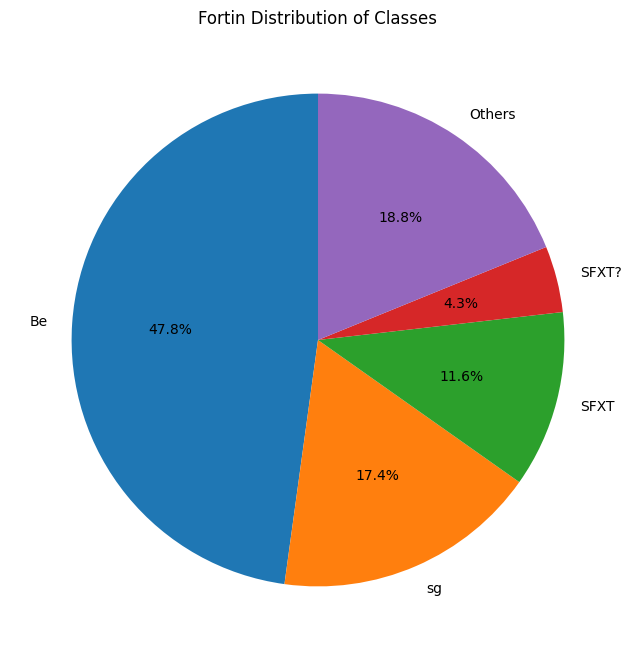

['Main_ID', 'best_ID', 'AGILE_ID', 'HEAO_ID', 'UHURU4_ID', 'ARIEL3_ID', 'IGR_ID', '2E_ID', 'ROSAT_ID', 'ROSATF_ID', 'FERMI_ID', 'SAX_ID', 'Swift_ID', 'XMM_ID', 'Chandra_ID', '2MASS_ID', 'Gaia_ID']
['Name', 'ID_Flag', 'Alt_Name', 'Gaia_DR3_ID', 'IDS', '_2MASS_ID', 'CatWISE_ID', 'ROSAT_ID', 'XMM_ID', 'Chandra_ID', 'XRT_ID', 'BAT_ID', 'INTEGRAL_ID']


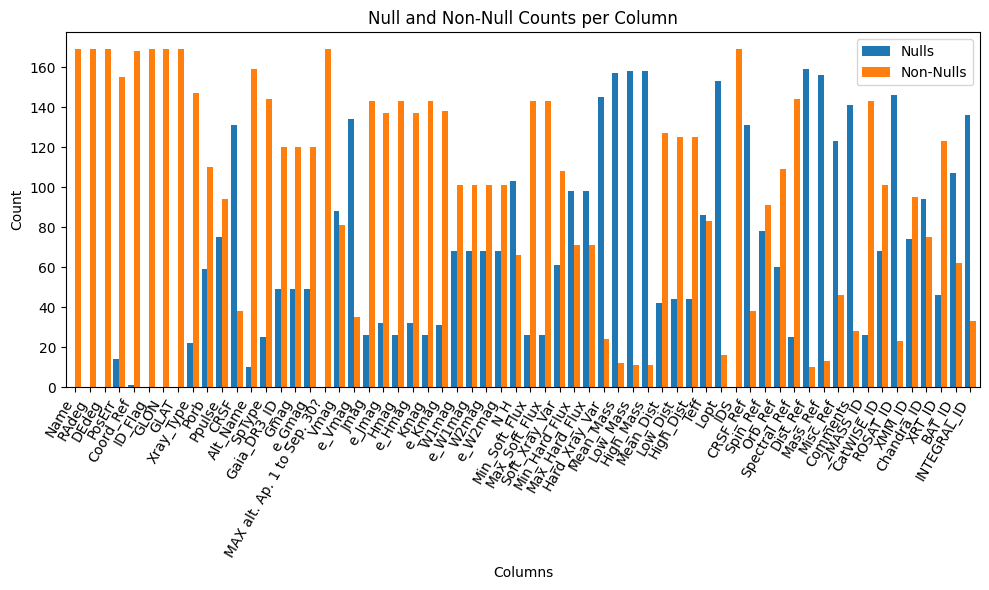

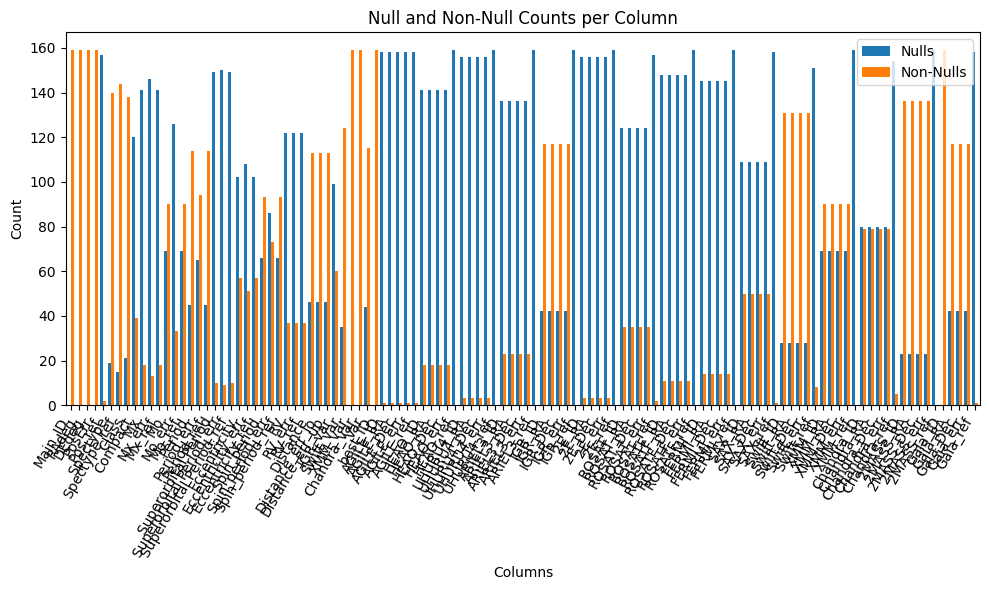

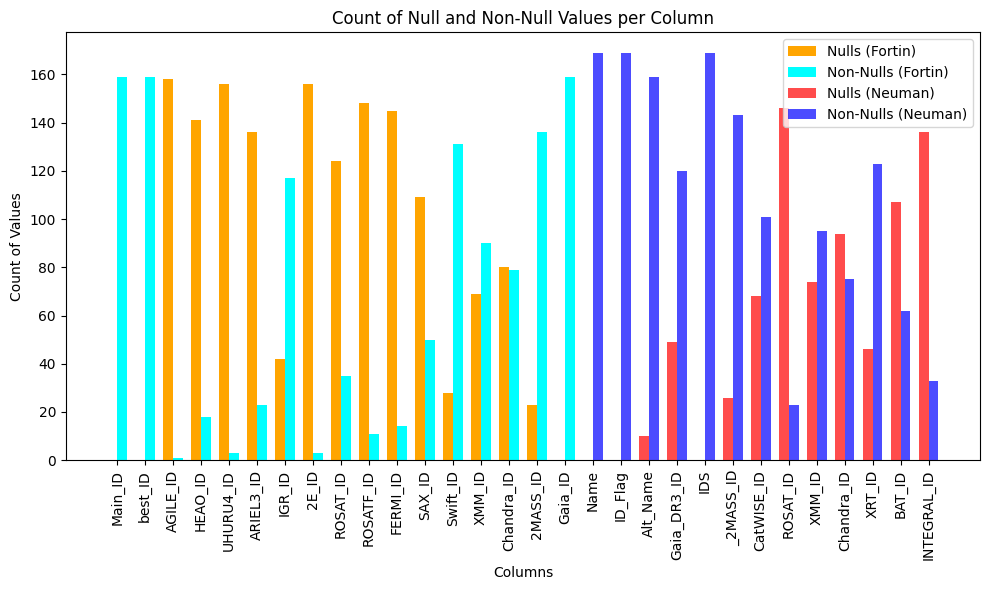

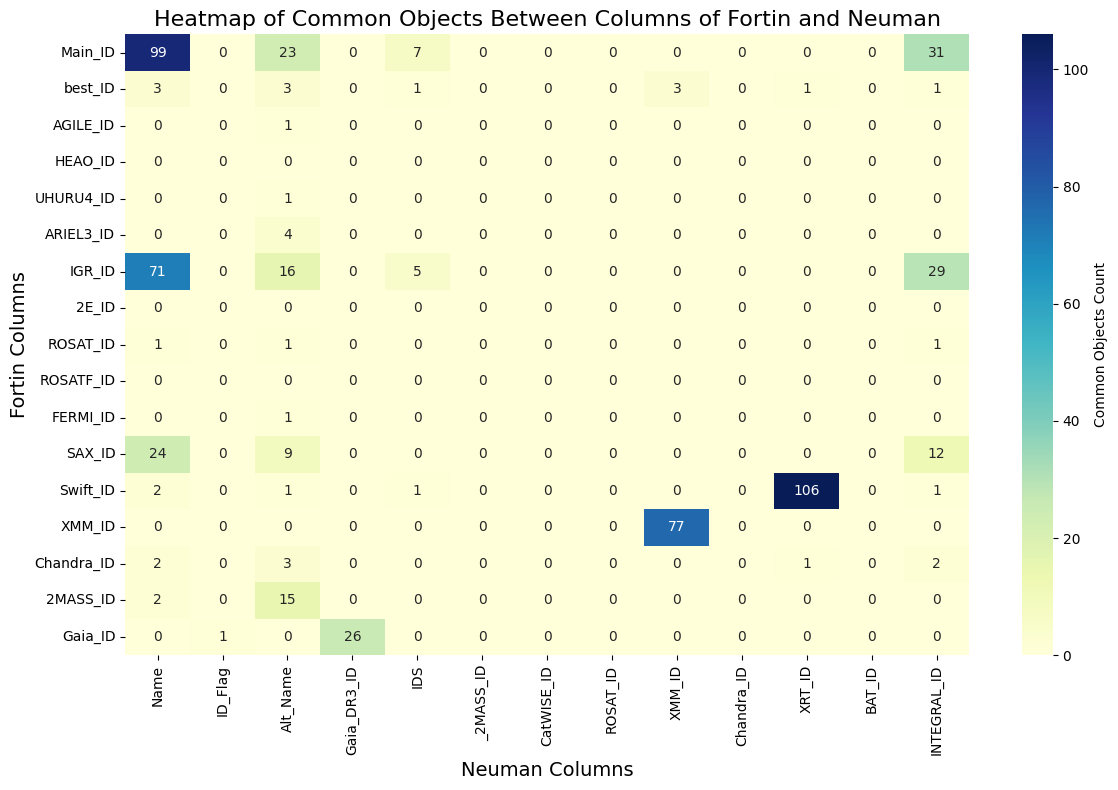

          Name       RAdeg      DEdeg    PosErr            Coord_Ref  ID_Flag  \
0      gam Cas   14.177451  60.716723  0.003013  2022arXiv220800211G        0   
1    mu.02 Cru  193.653451 -57.168711  0.000101  2022arXiv220800211G        0   
2    HD 110432  190.709317 -63.058642  0.000076  2022arXiv220800211G        0   
3    HD 153919  255.986566 -37.844120  0.000024  2022arXiv220800211G        0   
4  4U 0352+309   58.846151  31.045836  0.000036  2022arXiv220800211G        0   

         GLON       GLAT   Xray_Type    Porb  ...  Misc_Ref Comments  \
0  123.576993  -2.148422  BE,Gcas,RS  203.59  ...       NaN      NaN   
1  303.364521   5.700369          BE     NaN  ...       NaN      NaN   
2  301.957910  -0.203161     BE,Gcas  226.00  ...       NaN      NaN   
3  347.754453   2.173489    EB,RS,SG    3.41  ...       NaN      NaN   
4  163.081360 -17.136200    BE,CL,XP  250.30  ...       NaN      NaN   

          _2MASS_ID           CatWISE_ID               ROSAT_ID  \
0  00564251+6

In [1]:
import warnings
warnings.simplefilter("ignore", category=UserWarning)
%run Data_and_catalogs_proyect.ipynb

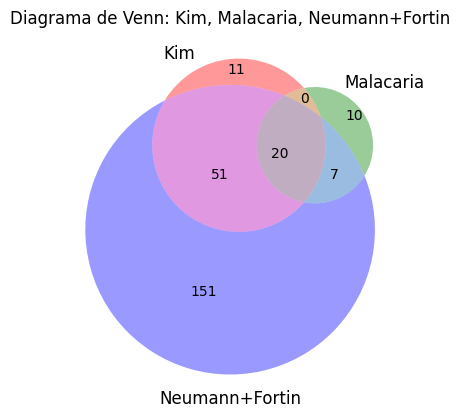

<Figure size 100x100 with 0 Axes>

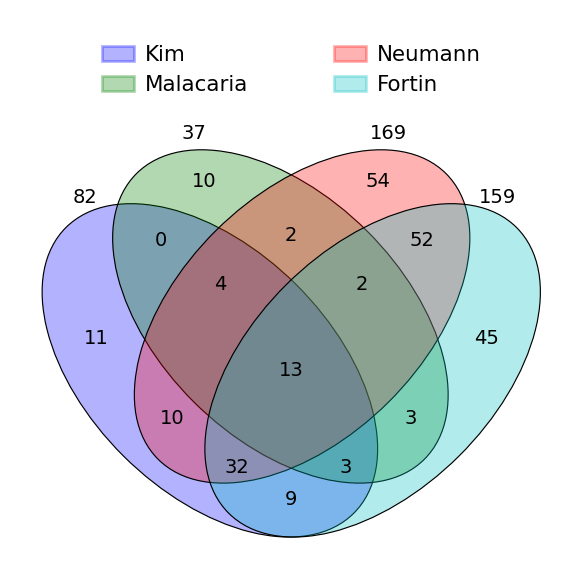

In [3]:
from matplotlib_venn import venn3
from matplotlib import pyplot as plt

kim = set(names_kim_t) | set(names_kim_p)
malacaria = set(names_malacaria_transient) | set(names_malacaria_persistent)
neumann = set(names_neuman)
fortin = set(names_fortin)

neumann_fortin = neumann | fortin

venn_diagram = venn3(
    subsets=(
        len(kim - malacaria - neumann_fortin),
        len(malacaria - kim - neumann_fortin),
        len(kim & malacaria - neumann_fortin),
        len(neumann_fortin - kim - malacaria),
        len(kim & neumann_fortin - malacaria),
        len(malacaria & neumann_fortin - kim),
        len(kim & malacaria & neumann_fortin)
    ),
    set_labels=("Kim", "Malacaria", "Neumann+Fortin")
)

plt.title("Diagrama de Venn: Kim, Malacaria, Neumann+Fortin")
plt.figure(figsize=(1, 1))
plt.show()


from venny4py.venny4py import *

sets = {
    'Kim': set(names_kim_t) | set(names_kim_p),
    'Malacaria': set(names_malacaria_transient) | set(names_malacaria_persistent),
    'Neumann': set(names_neuman),
    'Fortin': set(names_fortin)
}

venny4py(sets=sets)

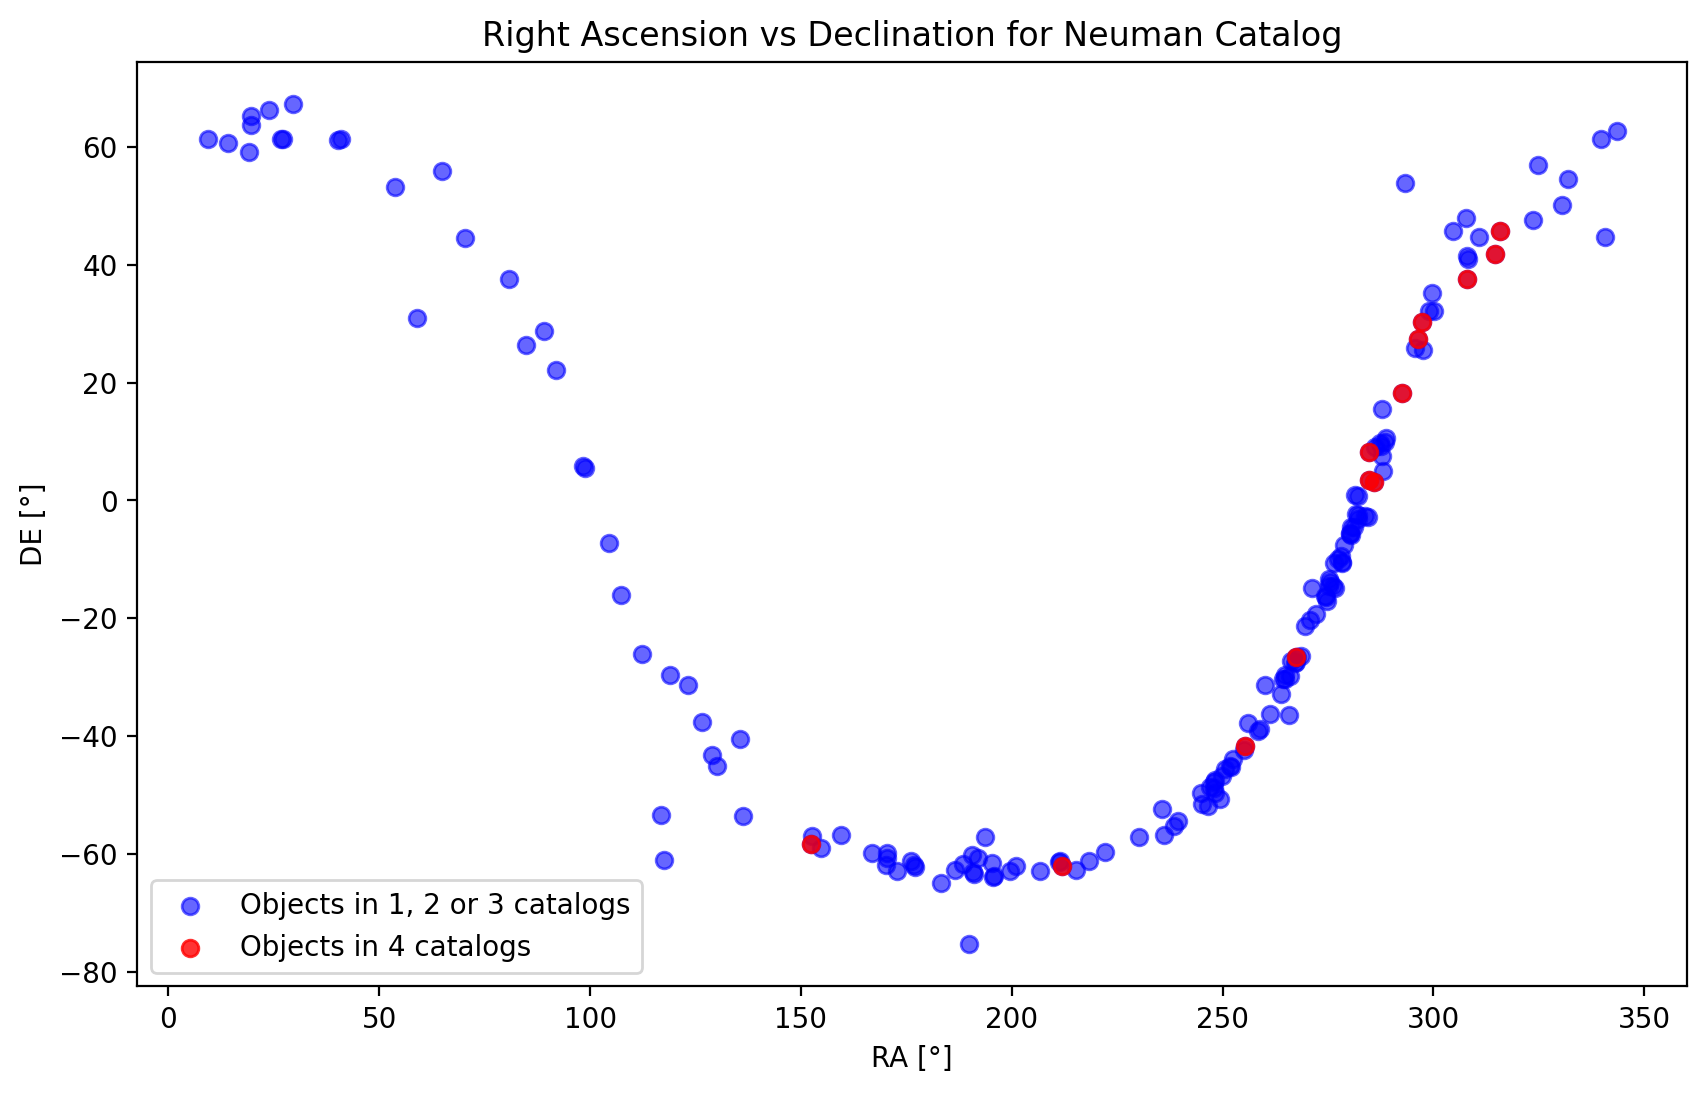

In [4]:
ra_deg = cat_neuman["RAdeg"]
de_deg = cat_neuman["DEdeg"]

coordenadas_comunes = cat_neuman[cat_neuman["Name"].isin(elementos_en_cuatro_catalogos)][["RAdeg", "DEdeg"]]
plt.figure(figsize=(10, 6))

plt.scatter(ra_deg, de_deg, marker='o', color='blue', alpha=0.6, label='Objects in 1, 2 or 3 catalogs')
plt.scatter(coordenadas_comunes["RAdeg"], coordenadas_comunes["DEdeg"], marker='o', color='red', alpha=0.8, label='Objects in 4 catalogs')

plt.title("Right Ascension vs Declination for Neuman Catalog")
plt.xlabel("RA [°]")
plt.ylabel("DE [°]")
plt.legend()
plt.show()

### Now we plot the same, but mor especific.

In [5]:
grupos_coordenadas = {}
for i in range(1, 5):
    elementos = conteo_nombres[conteo_nombres == i].index.tolist()
    grupos_coordenadas[i] = cat_neuman[cat_neuman["Name"].isin(elementos)][["RAdeg", "DEdeg"]]

plt.figure(figsize=(10, 6))
colores = {1: ('yellow', 0.25), 2: ('yellow', 0.5), 3: ('orange', 0.75), 4: ('red', 1)}

plt.scatter(ra_deg, de_deg, marker='o', color='gray', alpha=0.3, label='Otros objetos')

for i, (color, alpha) in colores.items():
    coords = grupos_coordenadas.get(i, pd.DataFrame(columns=["RAdeg", "DEdeg"]))
    if not coords.empty:
        plt.scatter(coords["RAdeg"], coords["DEdeg"], marker='o', color=color, alpha=alpha, label=f'{i} catálogo(s)')

plt.title("Gráfico de Puntos según RAdeg y DEdeg")
plt.xlabel("RA (grados)")
plt.ylabel("DE (grados)")
plt.grid()
plt.legend()
plt.show()

NameError: name 'conteo_nombres' is not defined

### Now The same objects but for the Galactic Latitude and Longitude. As we see, almost all objects are plus minus five degrees above/below the galactic plane. 

In [ ]:
grupos_coordenadas = {}
for i in range(1, 5):
    elementos = conteo_nombres[conteo_nombres == i].index.tolist()
    grupos_coordenadas[i] = cat_neuman[cat_neuman["Name"].isin(elementos)][["GLON", "GLAT"]]

plt.figure(figsize=(10, 6))
colores = {1: 'green', 2: 'orange', 3: 'purple', 4: 'red'}

for i, coords in grupos_coordenadas.items():
    plt.scatter(coords["GLON"], coords["GLAT"], marker='o', color=colores[i], alpha=0.8, label=f'{i} catalog(s)')

plt.title("Galactic coordinates (Latitude vs Longitude) in Neumann Catalog")
plt.xlabel("GLON [°]")
plt.ylabel("GLAT [°]")
plt.legend()
plt.show()

### We briefly remember the definition of the Galactic longitude (l) and the Galactic latitude (b).

In [ ]:
display(Image(filename='coordenadas_galacticas.png'))

In [ ]:
nombre_excel = "HMXB_catalogs.xlsx"
cat_neuman = pd.read_excel(nombre_excel, sheet_name="HMXB_cat_Neumann")
glon, glat = cat_neuman["GLON"].values, cat_neuman["GLAT"].values

fig, ax = plt.subplots(figsize=(10, 7))

m = Basemap(projection='hammer', lon_0=0, ax=ax)

img = mpimg.imread('galaxia.jpg')
m.imshow(img, origin='upper', alpha=1)

x, y = m(glon, glat)
m.scatter(x, y, c='cyan', s=10, alpha=0.8, label='HMXBs')

for lat in np.arange(-75, 76, 15):
    x_text, y_text = m(-180, lat)
    plt.text(x_text, y_text, f'{lat}°', ha='right', va='center', fontsize=9, color='black')

plt.subplots_adjust(left=0.05, right=0.95, top=0.8, bottom=0.1)

plt.title("HMXBs on the Galactic Plane (Hammer's Projection) for Neumann Catalog, using GLON/GLAT coordinates")
plt.legend(loc='lower right')

plt.show()


Now, I show the distribution in galactic coordinates for Neumann Catalog, also with error bars in diagonals, and the distance to the galactic plane in the colorbar.

Also, the distance $D_{plane}$ to the galactic plane, given the distance to the sun $d_{sun}$ and the latitude $b$:

$$D_{plane} = d_{sun}\cdot sin(b)$$

The $X$ and $Y$ distances in parsecs, are the following (given the galactic longitude $l$):

$$ X = d_{sun}\cdot cos(b)\cdot cos(l)$$
$$ Y = d_{sun}\cdot cos(b)\cdot sin(l)$$

The error bars were calculated taking into acount the low and high distances to the sun. 

In [ ]:
df = pd.read_excel('HMXB_catalogs.xlsx', sheet_name='HMXB_cat_Neumann')
glon = np.deg2rad(df['GLON'].values)
glat = np.deg2rad(df['GLAT'].values)
mean_dist = df['Mean_Dist'].values * u.pc
low_dist = df['Low_Dist'].values * u.pc
high_dist = df['High_Dist'].values * u.pc

mean_dist = mean_dist.to(u.kpc).value
low_dist = low_dist.to(u.kpc).value
high_dist = high_dist.to(u.kpc).value

error_sup = (high_dist - mean_dist) / 2
error_inf = (mean_dist - low_dist) / 2

error_sup = np.abs(error_sup)
error_inf = np.abs(error_inf)

x = mean_dist * np.cos(glat) * np.cos(glon)
y = mean_dist * np.cos(glat) * np.sin(glon)
x = -x
dist_plano = mean_dist * np.sin(glat)

x_err_sup = error_sup * (x / np.sqrt(x**2 + y**2))
y_err_sup = error_sup * (y / np.sqrt(x**2 + y**2))
x_err_inf = error_inf * (x / np.sqrt(x**2 + y**2))
y_err_inf = error_inf * (y / np.sqrt(x**2 + y**2))

plt.figure(figsize=(8, 8))
img = plt.imread('galaxia_coord.png')
plt.imshow(img, extent=[-20, 20, -20, 20], aspect='auto', zorder=0, alpha=0.8)

sc = plt.scatter(x, y, c=dist_plano, cmap="bwr", s=30, alpha=1, edgecolor='none', zorder=1)

cbar = plt.colorbar(sc)
cbar.set_label('Distance to the galactic plane (kpc)')

for i in range(len(x)):
    plt.plot([x[i], x[i] + x_err_sup[i]], 
             [y[i], y[i] + y_err_sup[i]], 
             color='red', alpha=0.5, linewidth=1.)
    plt.plot([x[i], x[i] - x_err_inf[i]], 
             [y[i], y[i] - y_err_inf[i]], 
             color='green', alpha=0.5, linewidth=1.)

plt.title('Galactic Distribution for Neumann Catalog, with Confidence intervals at 68%')
plt.xlabel('X (kpc)')
plt.ylabel('Y (kpc)')
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)

plt.grid(False)
plt.show()


In [ ]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, mark_inset
import matplotlib.pyplot as plt

period = v2023_09_Fortin["Period"].values
spin_period = v2023_09_Fortin["Spin_period"].values
clases = v2023_09_Fortin["Class"].values

unique_classes = v2023_09_Fortin["Class"].dropna().unique()

colors = plt.colormaps['tab20'](range(len(unique_classes)))

markers = ['o', '^', 'x', '*', 's', 'D', 'p', 'h', 'v', '<', '>', 'X']

estilos_de_clase = {
    cls: {'color': colors[i % len(colors)], 'marker': markers[i % len(markers)]}
    for i, cls in enumerate(unique_classes)
}

mask_valid = ~np.isnan(period) & ~np.isnan(spin_period)
valid_period = period[mask_valid]
valid_spin_period = spin_period[mask_valid]

total_objects = len(period)
valid_objects = len(valid_period)

fig, ax = plt.subplots(figsize=(8, 5))

for cls in estilos_de_clase.keys():
    mask = clases == cls
    ax.scatter(period[mask], spin_period[mask], 
               color=estilos_de_clase[cls]['color'], 
               marker=estilos_de_clase[cls]['marker'], 
               label=cls if len(period[mask]) > 0 else "")

ax.set_title(f"Corbet Diagram for Fortin catalogue ({valid_objects} objects with valid parameters out of {total_objects} total)")

ax.set_xlabel("Log(Orbital Period)")
ax.set_ylabel("Log(Spin Period)")
ax.set_yscale("log")
ax.set_xscale("log")
ax.grid()

ax.legend(title="Class", loc='upper right')
plt.show()


In [ ]:
display(Image(filename='conversion_coordenadas.png'))

One hour is equivalent to $15°$, 1 minute to $\frac{15°}{60}$ and 1 second equal to $\frac{15°}{3600}$. In both kim catalogs their objects have their equatorial coordinates as:
$$RA: [hours, minutes, seconds]$$
$$DEC: [degrees, arcmin, arcsec]$$
And therefore we have to convert them to degrees [°]
Here we want to use kim catalog to corroborate the distribution of Neumann Catalog in RA/DEC and also LAT/LONG graphics.

In [ ]:
kim_persistent = columna_kim_p.values
kim_transient = columna_kim_t.values

def convertir_coordenadas(elemento):
    partes = elemento.split()
    
    ra_hms = f"{partes[3]}h{partes[4]}m{partes[5]}s" 
    dec_dms = f"{partes[6]}d{partes[7]}m{partes[8]}s"
    spin_p = partes[9]
    ra = Angle(ra_hms).degree
    dec = Angle(dec_dms).degree
    return ra, dec, spin_p

ra_persistent, dec_persistent, spin_p_pers = zip(*[convertir_coordenadas(el) for el in kim_persistent])

ra_transient, dec_transient, spin_p_trans = zip(*[convertir_coordenadas(el) for el in kim_transient])
def convert_to_galactic(ra, dec):
    coord = SkyCoord(ra=ra * u.degree, dec=dec * u.degree, frame='icrs')
    lon = coord.galactic.l.degree
    lat = coord.galactic.b.degree
    return lon, lat

lon_persistent, lat_persistent = convert_to_galactic(ra_persistent, dec_persistent)
lon_transient, lat_transient = convert_to_galactic(ra_transient, dec_transient)
plt.figure(figsize=(8, 8))
plt.scatter(lon_transient, lat_transient, c='blue', marker='o', s=50, alpha=0.7, label="transient")
plt.scatter(lon_persistent, lat_persistent, c='red', marker='o', s=50, alpha=0.7, label="persistent")
plt.title('Galactic Coodinates for Kim Catalog')
plt.xlabel('Galactic Longitude [°]')
plt.ylabel('Galactic Latitude [°]')
plt.legend(loc='best')
plt.show()


Now we convert the equatorial coordinates to galactic coordinates.

In [ ]:
plt.figure(figsize=(10, 6))

plt.scatter(ra_persistent, dec_persistent, marker='o', color='blue', alpha=0.8, label='Kim Persistent')
plt.scatter(ra_transient, dec_transient, marker='o', color='green', alpha=0.8, label='Kim Transient')
plt.title("Equatorial coordinates for Kim Catalog")
plt.xlabel("Right Ascension [°]")
plt.ylabel("Declination [°]")
plt.grid()
plt.legend()
plt.show()

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Max_Soft_Flux = cat_neuman['Max_Soft_Flux']
Min_Soft_Flux = cat_neuman['Min_Soft_Flux']
df['Geometric_Mean'] = np.sqrt(df['Max_Soft_Flux'] * df['Min_Soft_Flux'])

def plot_log_histogram_geometric_mean(data, bins_per_decade=8, color='blue'):
    data_filtered = data
    data_clean = data_filtered[~np.isnan(data_filtered)]

    print(f"Total original data points: {len(data)}")
    print(f"Total valid data points (filtered and without NaN): {len(data_clean)}")

    if len(data_clean) > 0:
        min_exp = np.floor(np.log10(np.min(data_clean)))
        max_exp = np.ceil(np.log10(np.max(data_clean)))
        bins = np.logspace(min_exp, max_exp, int((max_exp - min_exp) * bins_per_decade))

        n, bins, patches = plt.hist(data_clean, bins=bins, color=color, alpha=0.7)
        plt.xscale('log')
        plt.xlabel('Geometric Mean Flux (Min and Max Soft Flux from Neumann Catalog)')
        plt.ylabel('Frequency')
        plt.title('Histogram of the Geometric Mean of Soft Fluxes')

        for patch in patches:
            patch.set_edgecolor('black')

        plt.show()
    else:
        print("No valid data points to display the histogram.")

plot_log_histogram_geometric_mean(df['Geometric_Mean'], bins_per_decade=6, color='blue')


NameError: name 'df' is not defined

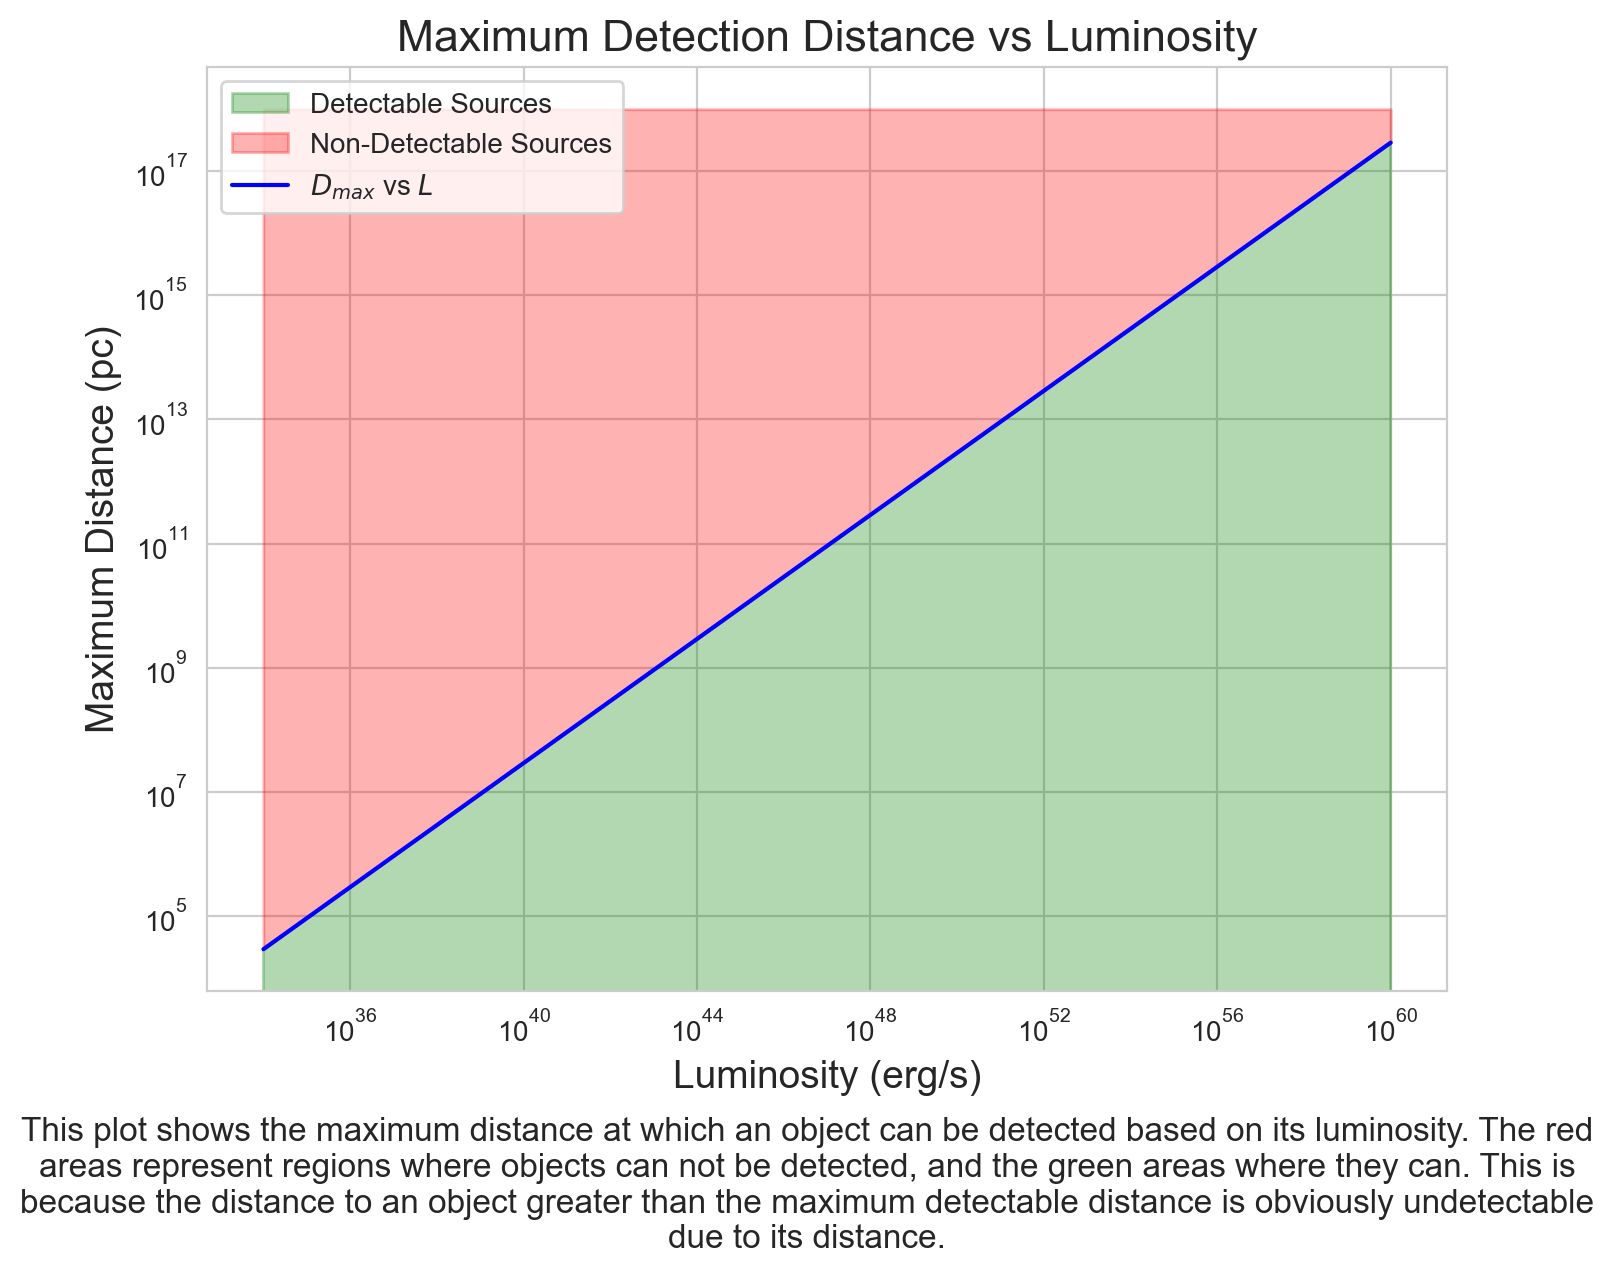

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from astropy import units as u

F_min = 1e-13
constant = 7.96e11

def max_distance(L):
    return np.sqrt(constant * L) * u.cm

luminosities = np.logspace(34, 60, num=100)
distances = max_distance(luminosities)
distances_pc = distances.to(u.pc)
max_distance_limit = 1e18 * u.pc

plt.figure(figsize=(8, 6))

plt.fill_between(luminosities, distances_pc.value, 0, where=(luminosities <= luminosities), color='green', alpha=0.3, label='Detectable Sources')
plt.fill_between(luminosities, distances_pc.value, max_distance_limit.value, color='red', alpha=0.3, label='Non-Detectable Sources')

plt.plot(luminosities, distances_pc.value, label=r'$D_{max}$ vs $L$', color='blue')

plt.xscale('log')
plt.yscale('log')
plt.xlabel('Luminosity (erg/s)', fontsize=14)
plt.ylabel('Maximum Distance (pc)', fontsize=14)
plt.title('Maximum Detection Distance vs Luminosity', fontsize=16)

plt.figtext(0.5, -0.1, 
            'This plot shows the maximum distance at which an object can be detected based on its luminosity. '
            'The red areas represent regions where objects can not be detected, and the green areas where they can. '
            'This is because the distance to an object greater than the maximum detectable distance is obviously undetectable due to its distance.',
            wrap=True, horizontalalignment='center', fontsize=12)

plt.legend()
plt.show()

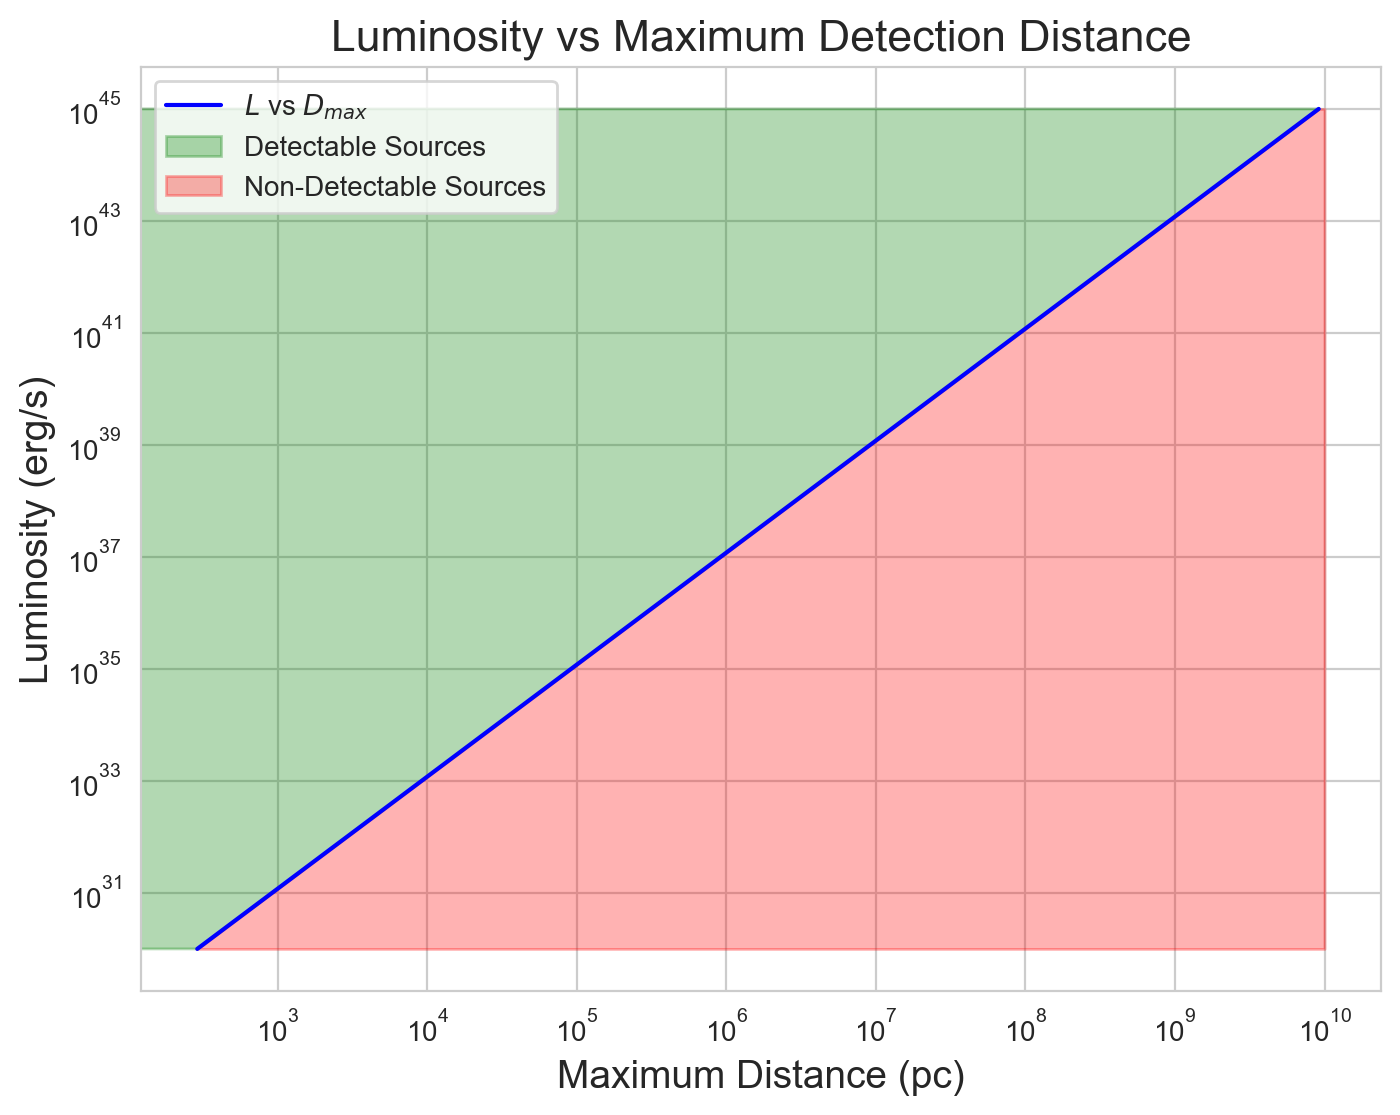

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from astropy import units as u

F_min = 1e-13
constant = 7.96e11

def max_distance(L):
    return np.sqrt(constant * L) * u.cm

luminosities = np.logspace(30, 45, num=100)
distances = max_distance(luminosities)
distances_pc = distances.to(u.pc)
max_distance_limit = 1e10 * u.pc

plt.figure(figsize=(8, 6))

plt.plot(distances_pc.value, luminosities, label=r'$L$ vs $D_{max}$', color='blue')

plt.fill_betweenx(luminosities, 0, distances_pc.value, color='green', alpha=0.3, label='Detectable Sources')
plt.fill_betweenx(luminosities, distances_pc.value, max_distance_limit.value, color='red', alpha=0.3, label='Non-Detectable Sources')

plt.xscale('log')
plt.yscale('log')

plt.xlabel('Maximum Distance (pc)', fontsize=14)
plt.ylabel('Luminosity (erg/s)', fontsize=14)
plt.title('Luminosity vs Maximum Detection Distance', fontsize=16)

plt.legend()

plt.show()

# Now I make the histogram for the distance in the Distance Column of Fortin and the BAT/Swift Flux in the Actualized Neuman catalog.

From Neumann Catalog (2023) we have the fluxes from XRT:

- **`min_XRT_flux`**: $10^{-12} \, \text{erg} \, \text{cm}^{-2} \, \text{s}^{-1}$  
  Minimum X-ray flux for Swift/XRT (0.3-10.0 keV).

- **`max_XRT_flux`**: $10^{-12} \, \text{erg} \, \text{cm}^{-2} \, \text{s}^{-1}$  
  Maximum X-ray flux for Swift/XRT (0.3-10 keV).

And from the Distance column from Fortin Catalog. If we would want to analize the luminosity histogram for the soft x ray regime instead of the hard one, we would have to take the 0.3-10 keV from the XRT_min_flux and XRT_max_flux columns from Neumann (which are also Swift but for XRT instrument) Catalog.

# Conversion of Luminosity as a Function of Flux and Distance

The luminosity ($ L $) of an astronomical object can be calculated from the observed flux ($ F $) and the distance to the source ($ d $) using the following formula:

$
L = 4 \pi d^2 F
$

### Variables:
- **$ L $**: Luminosity, measured in erg per second ($ \text{erg/s} $) or any other unit of power.
- **$ d $**: Distance from the radiation source, measured in units such as parsecs ($ \text{pc} $), light-years ($ \text{ly} $), or meters ($ \text{m} $).
- **$ F $**: Observed flux, measured in erg per second per square centimeter ($ \text{erg/s/cm}^2 $).

### 1. **Inverse Square Law**
The term $ d^2 $ in the formula comes from the inverse square law, which describes how the intensity of light decreases with distance from the source. As we move away from the source, the radiation spreads out over a larger sphere, causing the flux to decrease with the square of the distance.

### 2. **Units in the Formula**
For the formula to be consistent, the units must be appropriate. Below are descriptions of common unit conversions that may be needed to use the formula correctly:

#### 2.1. **Flux**
Flux $ F $ is typically measured in units of $ \text{erg/s/cm}^2 $, which represents the amount of energy per second passing through a square centimeter of area. If the flux is measured in other units, it should be converted to this unit to use the formula.

#### 2.2. **Distance**
The distance $ d $ is a crucial parameter. Depending on the units used, appropriate conversions must be made to get consistent results.

- **Parsecs to Centimeters:**
  A parsec is a unit of distance used in astronomy, and its value is approximately:

  $
  1 \, \text{pc} = 3.086 \times 10^{18} \, \text{cm}
  $

  Therefore, if the distance is in parsecs and the flux is in $ \text{erg/s/cm}^2 $, no further conversion is needed since the formula directly uses parsecs for the calculations.

- **Light-years to Centimeters:**
  A light-year is the distance light travels in one year. The conversion from light-years to centimeters is as follows:

  $
  1 \, \text{ly} = 9.461 \times 10^{17} \, \text{cm}
  $

  If the distance is given in light-years, you can convert it to centimeters using this equivalence.

- **Meters to Centimeters:**
  If the distance is in meters, simply multiply by $ 10^2 $ to convert it to centimeters.

#### 2.3. **Luminosity Unit Conversion**
The luminosity $ L $ is obtained in units of erg per second $ \text{erg/s} $, which is a standard unit of power in astronomy. If you need to convert this unit to other units of power, such as watts, you can use the following conversion:

$
1 \, \text{erg/s} = 1 \times 10^{-7} \, \text{W}
$

### 3. **Example of Luminosity Calculation**
Suppose we have a flux of $ F = 10^{-12} \, \text{erg/s/cm}^2 $ and a distance of $ d = 1 \, \text{pc} $.

1. **Using the luminosity formula:**
   
   $
   L = 4 \pi (1 \, \text{pc})^2 \times 10^{-12} \, \text{erg/s/cm}^2
   $

2. **Convert the distance to centimeters:**
   We know that $ 1 \, \text{pc} = 3.086 \times 10^{18} \, \text{cm} $, so:

   $
   L = 4 \pi (3.086 \times 10^{18} \, \text{cm})^2 \times 10^{-12} \, \text{erg/s/cm}^2
   $

3. **Solving:**

   $
   L \approx 4 \pi (9.51 \times 10^{36} \, \text{cm}^2) \times 10^{-12} \, \text{erg/s/cm}^2
   $

   $
   L \approx 1.19 \times 10^{25} \, \text{erg/s}
   $

### 4. **Conclusion**
The formula $ L = 4 \pi d^2 F $ is a fundamental tool for calculating the luminosity of astronomical objects from their observed flux and distance. It is important to consider unit conversions, especially for distance, which can be in various units like parsecs, light-years, or meters. With proper unit conversions, we can obtain consistent and accurate luminosity results.



In [ ]:
cat_neuman_2

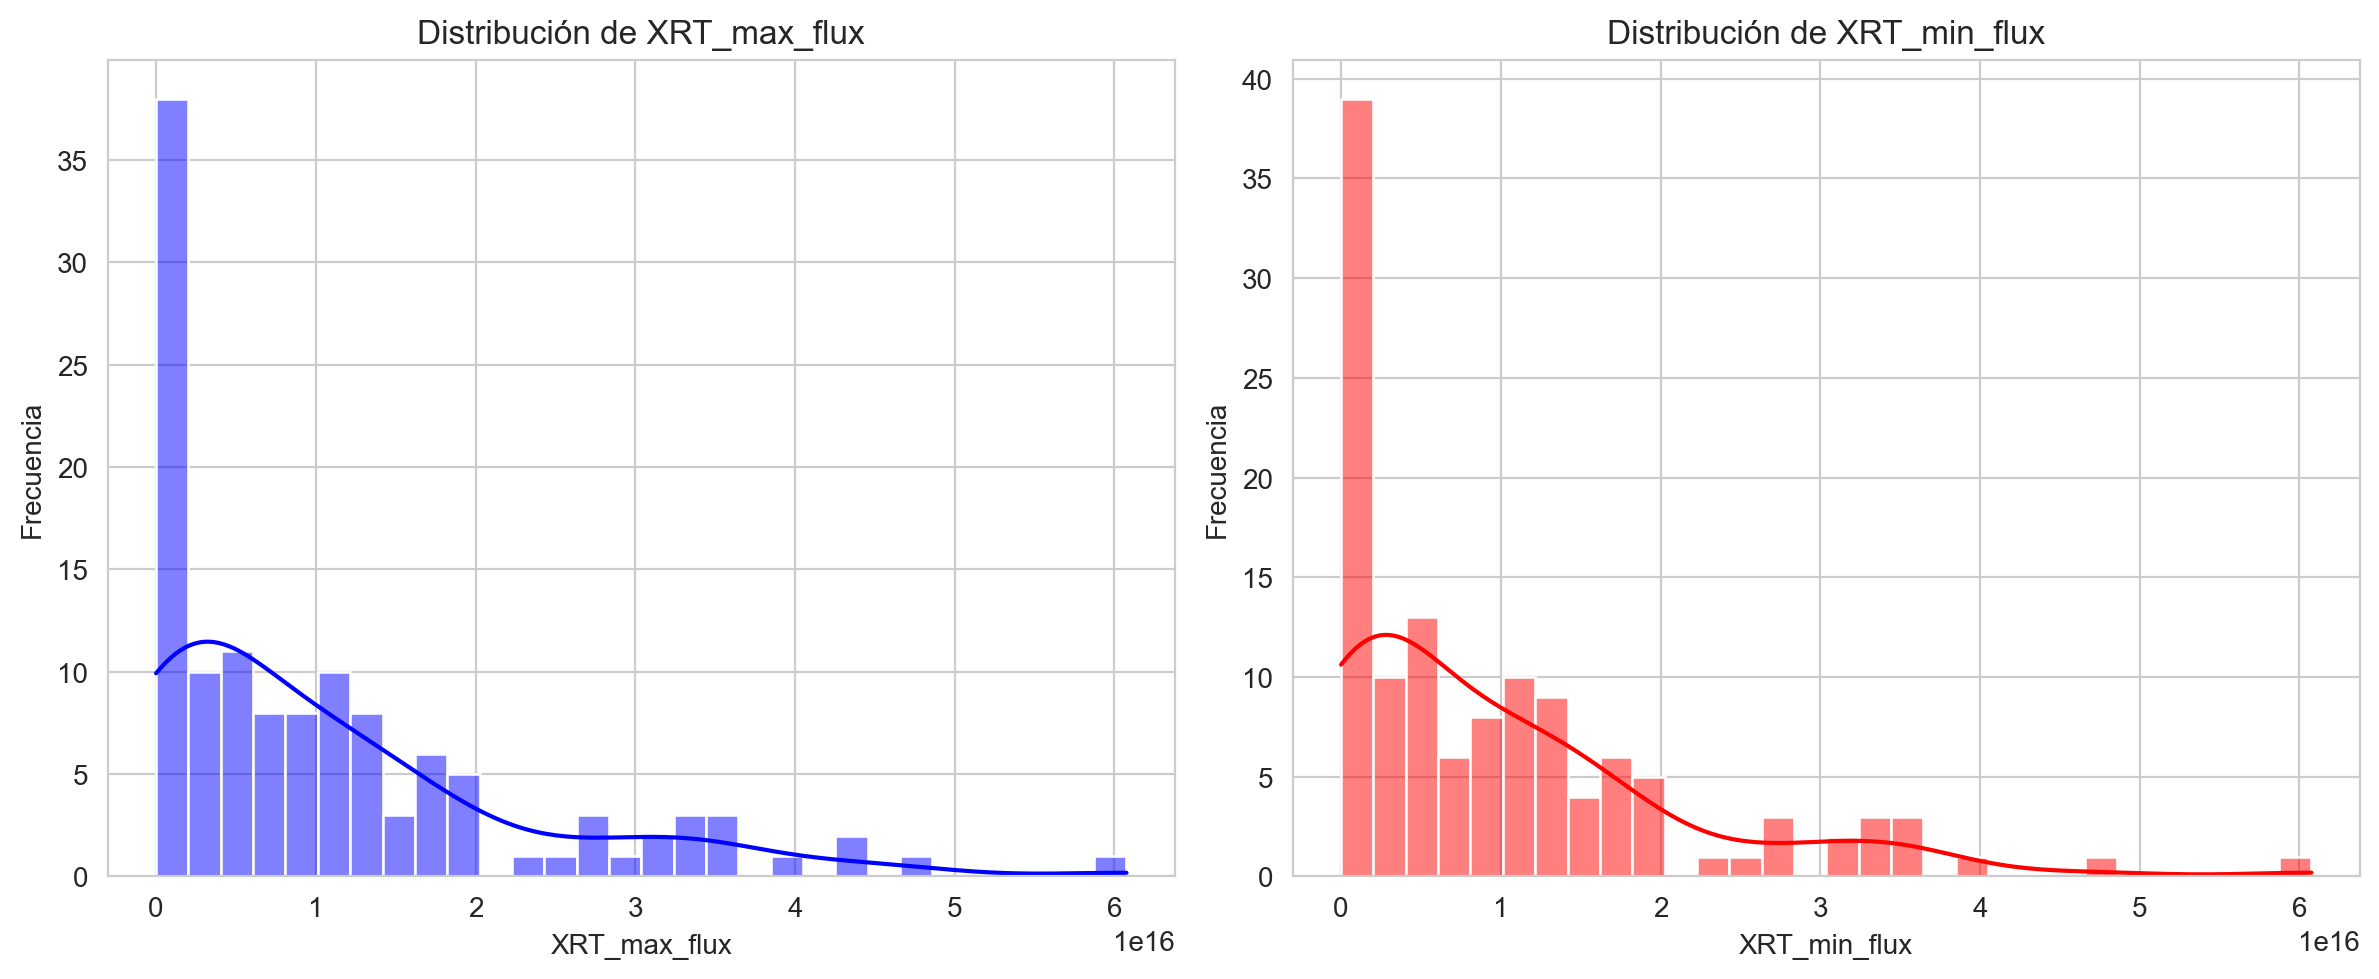

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.histplot(cat_neuman_2['XRT_max_flux'], bins=30, kde=True, ax=axes[0], color='blue')
axes[0].set_title("Distribución de XRT_max_flux")
axes[0].set_xlabel("XRT_max_flux")
axes[0].set_ylabel("Frecuencia")

sns.histplot(cat_neuman_2['XRT_min_flux'], bins=30, kde=True, ax=axes[1], color='red')
axes[1].set_title("Distribución de XRT_min_flux")
axes[1].set_xlabel("XRT_min_flux")
axes[1].set_ylabel("Frecuencia")

plt.tight_layout()
plt.show()


Total of original data: 172
Total of valid data (filtered and without NaN): 106


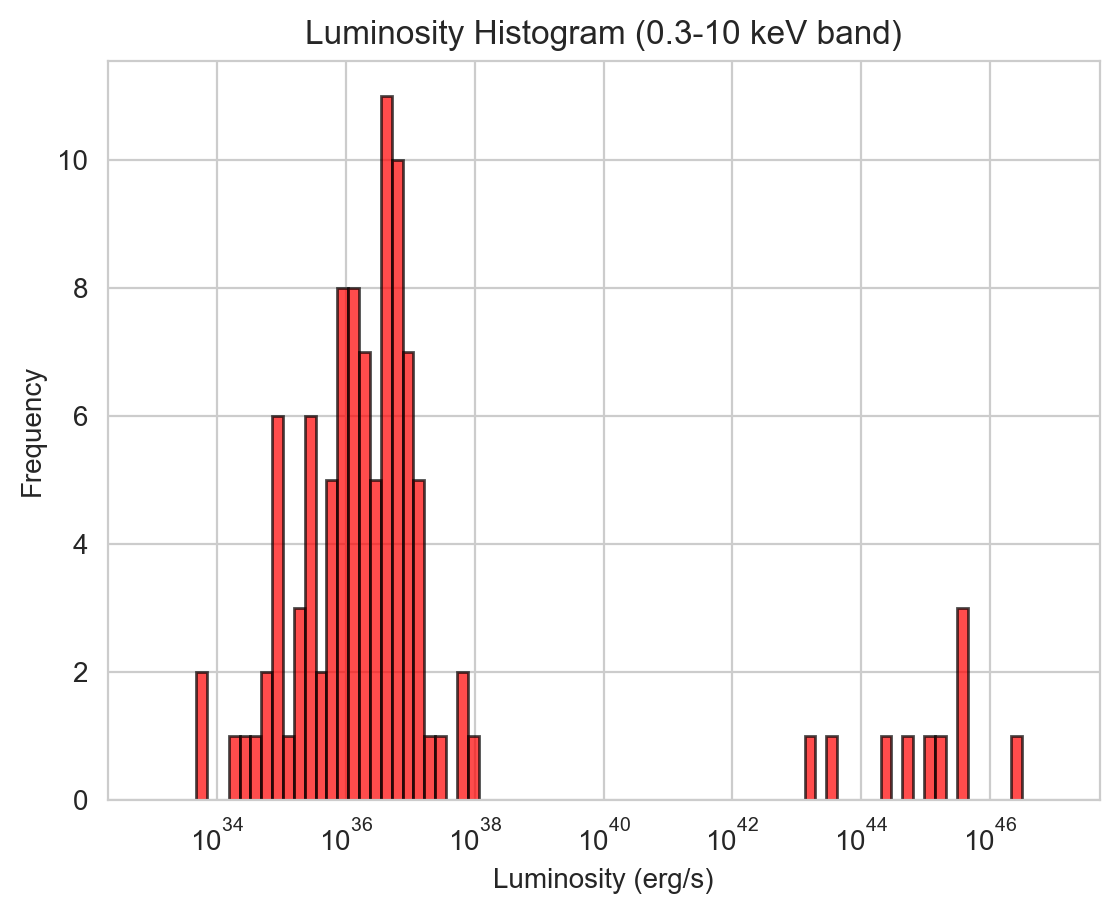

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

import numpy as np
import matplotlib.pyplot as plt
from astropy import units as u

geometric_mean_flux = (((cat_neuman_2['XRT_max_flux'] * cat_neuman_2['XRT_min_flux'])**0.5)).values * u.erg / (u.cm**2 * u.s)
distances = cat_neuman_2['Mean_Dist'].values * u.pc

geometric_mean_flux = np.where(geometric_mean_flux > 100000 * u.erg / (u.cm**2 * u.s), 
                                geometric_mean_flux * 1e-25, geometric_mean_flux)

luminosities = 4 * np.pi * geometric_mean_flux * (distances**2)

luminosities = luminosities.to(u.erg / u.s)
def plot_log_histogram_luminosity(data, bins_per_decade=8, color='red'):
    data_filtered = data[(data >= 1e20) & (data <= 1e50)]
    data_clean = data_filtered[~np.isnan(data_filtered)]

    print(f"Total of original data: {len(data)}")
    print(f"Total of valid data (filtered and without NaN): {len(data_clean)}")

    if len(data_clean) > 0:
        min_exp = np.floor(np.log10(np.min(data_clean)))
        max_exp = np.ceil(np.log10(np.max(data_clean)))
        bins = np.logspace(min_exp, max_exp, int((max_exp - min_exp) * bins_per_decade))

        n, bins, patches = plt.hist(data_clean, bins=bins, color=color, alpha=0.7)
        plt.xscale('log')
        plt.xlabel('Luminosity (erg/s)')
        plt.ylabel('Frequency')
        plt.title('Luminosity Histogram (0.3-10 keV band)')

        for patch in patches:
            patch.set_edgecolor('black')

        plt.show()
    else:
        print("There aren't any valid data to show.")

plot_log_histogram_luminosity(luminosities.value, bins_per_decade=6, color='red')

Total original luminosity points: 172
Total original distance points: 172
Total valid points: 96


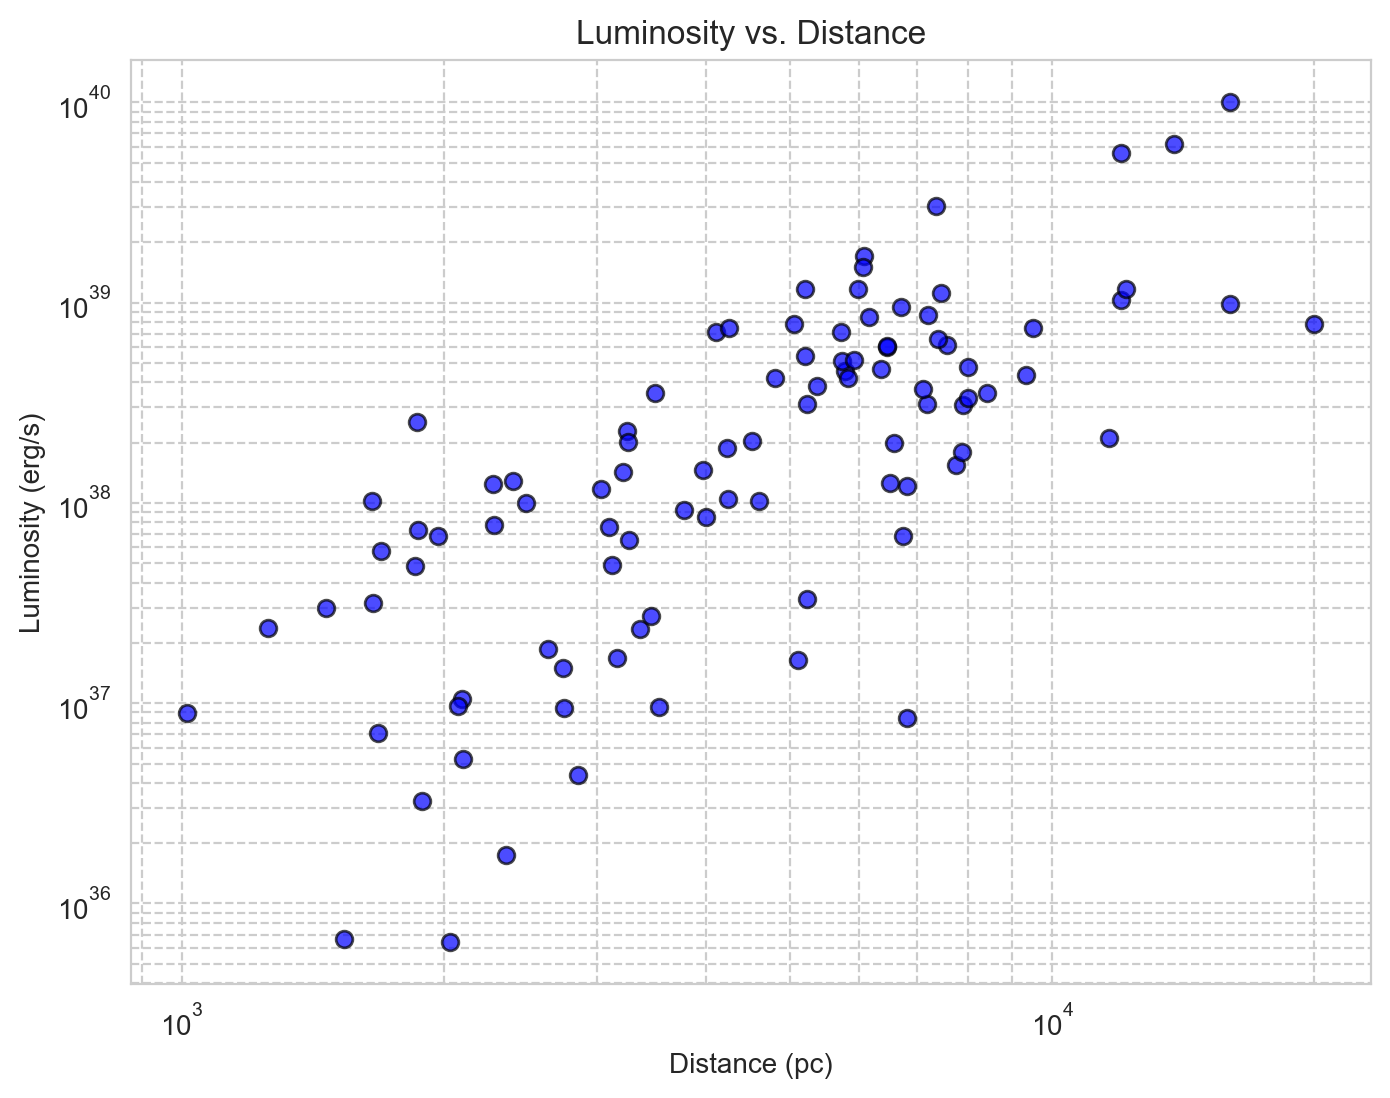

In [11]:
import numpy as np
import matplotlib.pyplot as plt

def plot_luminosity_vs_distance(luminosities, distances, color='blue'):
    luminosities_filtered = luminosities[(luminosities >= 1e35) & (luminosities <= 1e41)]
    distances_filtered = distances[(luminosities >= 1e35) & (luminosities <= 1e41)]
    valid_indices = ~np.isnan(luminosities_filtered) & ~np.isnan(distances_filtered)

    luminosities_clean = luminosities_filtered[valid_indices]
    distances_clean = distances_filtered[valid_indices]

    print(f"Total original luminosity points: {len(luminosities)}")
    print(f"Total original distance points: {len(distances)}")
    print(f"Total valid points: {len(luminosities_clean)}")

    if len(luminosities_clean) > 0 and len(distances_clean) > 0:
        plt.figure(figsize=(8, 6))
        plt.scatter(distances_clean, luminosities_clean, color=color, alpha=0.7, edgecolor='black')
        plt.xscale('log')
        plt.yscale('log')
        plt.xlabel('Distance (pc)')
        plt.ylabel('Luminosity (erg/s)')
        plt.title('Luminosity vs. Distance')
        plt.grid(True, which="both", ls="--")
        plt.show()
    else:
        print("No valid data points to plot.")

plot_luminosity_vs_distance(luminosities.value, distances.value, color='blue')